<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/TensorFlow_05_dogsVScats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, shutil

In [ ]:
original_db_dir = './train'
base_dir = './cats_and_dogs_small'
#os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import models
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
!unzip cats_and_dogs_small.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: cats_and_dogs_small/train/cats/cat.333.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.333.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.864.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.864.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.870.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.870.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.680.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.680.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.858.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.858.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.99.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.99.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.694.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.694.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.72.jpg  
  inflating: __MACOS

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# 새 섹션

In [ ]:
for data_batch, labels_batch in train_generator:
  print ('배치 데이터 크기:', data_batch.shape)
  print ('배치 레이블 크기:', labels_batch.shape)
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [ ]:
history = model.fit_generator( # 배치 제너레이터를 사용하여 모델 훈련
 train_generator,
 steps_per_epoch=100,
 epochs=30,
 validation_data=validation_generator,
 validation_steps=50)

model.save('cats_and_dogs_small_1.h5') # 모델 저장

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 118s 1s/step - loss: 0.6928 - acc: 0.5215 - val_loss: 0.7150 - val_acc: 0.3420
Epoch 2/30
100/100 [==============================] - 112s 1s/step - loss: 0.6707 - acc: 0.5900 - val_loss: 0.6881 - val_acc: 0.5340
Epoch 3/30
100/100 [==============================] - 111s 1s/step - loss: 0.6350 - acc: 0.6260 - val_loss: 0.6692 - val_acc: 0.5810
Epoch 4/30
100/100 [==============================] - 112s 1s/step - loss: 0.5932 - acc: 0.6870 - val_loss: 0.5987 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 111s 1s/step - loss: 0.5627 - acc: 0.7225 - val_loss: 0.6695 - val_acc: 0.6020
Epoch 6/30
100/100 [==============================] - 112s 1s/step - loss: 0.5404 - acc: 0.7235 - val_loss: 0.5344 - val_acc: 0.7430
Epoch 7/30
100/100 [==============================] - 110s 1s/step - loss: 0.5134 - acc: 0.7520 - val_loss: 0.5379 - val_acc: 0.7350
Epoch 8/30
100/100 [==============================] - 115s 1s/step - 

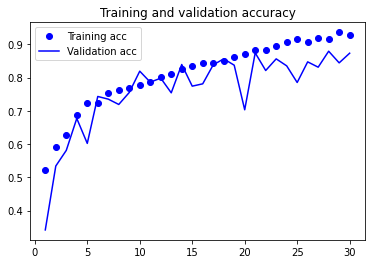

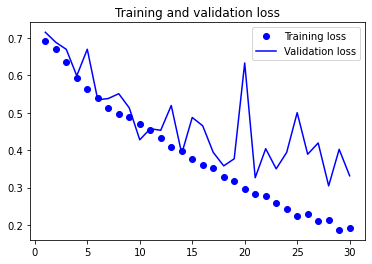

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 성능을 향상시키기 위해 원래 데이터에 랜덤변환을 적용하여 부풀림

In [ ]:
datagen = ImageDataGenerator(
 rotation_range=20,
 width_shift_range=0.1,
 height_shift_range=0.1,
 shear_range=0.1,
 zoom_range=0.1,
 horizontal_flip=True,
 fill_mode='nearest'
)

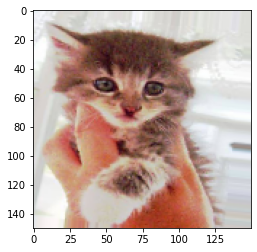

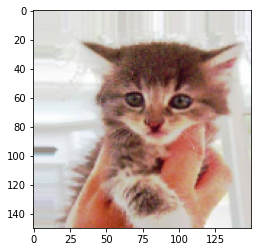

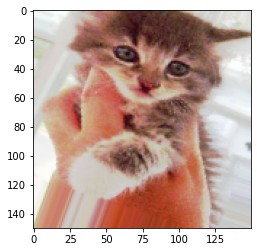

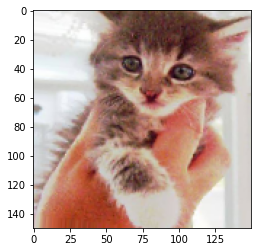

In [ ]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3] # 증식할 이미지 선택
img = image.load_img(img_path, target_size=(150,150)) # 이미지를 읽고 크기 변경
x = image.img_to_array(img) # (150,150,3) 크기의 numpy 배열로 변환
x = x.reshape((1,)+x.shape) # (1,150,150,3) 크기로 변환
i=0

for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0:
    break
  plt.show()

## something new model

In [ ]:
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
# 19페이지
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 )
test_datagen = ImageDataGenerator(rescale=1./255) # 검증 데이터는 증식되민 안됨
train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(150,150),
 batch_size=32,
 class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(150,150),
 batch_size=32,
 class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=300,
    validation_data=validation_generator,
    validation_steps=50
)
model.save('cats_and_dogs_small_2.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/300
100/100 [==============================] - 123s 1s/step - loss: 0.6776 - acc: 0.5675 - val_loss: 0.6212 - val_acc: 0.7325


In [ ]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(
 weights='imagenet',
 include_top=False,
 input_shape=(150,150,3)
)
conv_base.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [ ]:
def extract_features(dir, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      dir,
      target_size = (150,150),
      batch_size = batch_size,
      class_mode = 'binary'
  )
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size: (i+1)*batch_size] = features_batch
    labels[i*batch_size: (i+1)*batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
      break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [ ]:
from keras.layers import Dense, Dropout
from keras import models
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(Dense(256, activation='relu', input_dim=4*4*512))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc']
              )
history = model.fit(
    train_features,
    train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels)
)
model.save('cats_and_dogs_small_3.h5')

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - 3s 28ms/step - loss: 0.6928 - acc: 0.9905 - val_loss: 0.6884 - val_acc: 0.9930
Epoch 2/30
100/100 [==============================] - 2s 23ms/step - loss: 0.6861 - acc: 0.9960 - val_loss: 0.6854 - val_acc: 0.9860
Epoch 3/30
100/100 [==============================] - 2s 22ms/step - loss: 0.6795 - acc: 0.9950 - val_loss: 0.6787 - val_acc: 0.9860
Epoch 4/30
100/100 [==============================] - 2s 23ms/step - loss: 0.6723 - acc: 0.9965 - val_loss: 0.6697 - val_acc: 0.9900
Epoch 5/30
100/100 [==============================] - 2s 23ms/step - loss: 0.6651 - acc: 0.9955 - val_loss: 0.6626 - val_acc: 0.9890
Epoch 6/30
100/100 [==============================] - 2s 24ms/step - loss: 0.6550 - acc: 0.9980 - val_loss: 0.6547 - val_acc: 0.9880
Epoch 7/30
100/100 [==============================] - 2s 23ms/step - loss: 0.6456 - acc: 0.9990 - val_loss: 0.6446 - val_acc: 0.9930
Epoch 8/30
100/100 [==============================] - 2s 23ms/step - loss: 0.637

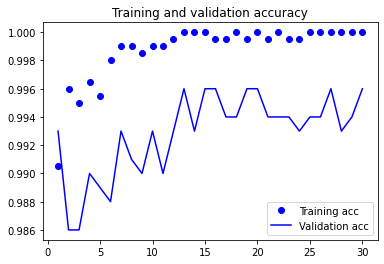

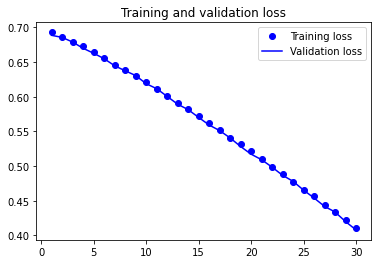

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()